In [2]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize
from string import punctuation
from nltk.stem import SnowballStemmer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
from tqdm import tqdm
from IPython.display import display_html

In [3]:
#Load the train and test datasets and drop NA
df_train = pd.read_csv('/home/songy4/Downloads/drugsComTrain_raw.csv').dropna(how = 'any', axis = 0)
df_test = pd.read_csv('/home/songy4/Downloads/drugsComTest_raw.csv').dropna(how = 'any', axis = 0)

#Check the shape of datasets
print("Train data shape is:", df_train.shape)
print("Test data shape is:", df_test.shape)

Train data shape is: (160398, 7)
Test data shape is: (53471, 7)


In [10]:
#Combine train and test data sets to learn about overall datasets
All = [df_train, df_test]
df_all = pd.concat(All)
print("Data shape is:", df_all.shape)

Data shape is: (213869, 7)


In [5]:
#Check the data type and null value numbers in the train dataset
df_all.info()
#Only condition column has 899 null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     213869 non-null  int64 
 1   drugName     213869 non-null  object
 2   condition    213869 non-null  object
 3   review       213869 non-null  object
 4   rating       213869 non-null  int64 
 5   date         213869 non-null  object
 6   usefulCount  213869 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [6]:
#Check unique ID function by sorting and check all dataset
df_all.sort_values(['uniqueID'], ascending = True, inplace = True)
df_all.head(1000)
#uniqueID is ordered by drugName, but seems like 

,uniqueID,drugName,condition,review,rating,date,usefulCount
47805,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
93135,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
143331,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
57030,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
106347,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
...,...,...,...,...,...,...,...
212,1103,Metronidazole,Rosacea,"""Many people don&#039;t seem to like Metrogel,...",9,29-Feb-12,110
19553,1104,Metronidazole,Rosacea,"""Great working only if you use non-stop...and ...",9,30-Sep-11,61
51627,1105,Metronidazole,Rosacea,"""This medicine worked for about two weeks and ...",2,11-Jan-11,33
26814,1106,Metronidazole,Rosacea,"""I used this in conjunction with Clenia. It wo...",8,5-Jan-11,22


In [7]:
#Check the last uniqueID
print(df_train.uniqueID.iloc[-1:])
#The last uniqueID is 215220 but there are total 161296 rows, that means 53924 IDs are missing in order. 
#This means uniqueID can't be replaced as an index.

161296    215220
Name: uniqueID, dtype: int64


In [7]:
#Drop uniqueID and date since they won't be in analysis

df_train = df_train.drop(['uniqueID', 'date'], axis = 1)
df_test = df_test.drop(['uniqueID', 'date'], axis = 1)

In [8]:
#Preprocessing review 

df_train['review'] = df_train['review'].replace(r'^\s*$', np.nan, regex=True).str.replace("\r\n","").str.replace("&#039;","'").str.replace(r'[^\d\w\s]', ' ').str.replace('\d+', '').str.replace(" ' ", '').str.lower()
df_test['review'] = df_test['review'].replace(r'^\s*$', np.nan, regex=True).str.replace("\r\n","").str.replace("&#039;","'").str.replace(r'[^\d\w\s]', ' ').str.replace('\d+', '').str.replace(" ' ", '').str.lower()
df_train.head()

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,it has no side effect i take it in combinati...,9,27
1,Guanfacine,ADHD,my son is halfway through his fourth week of ...,8,192
2,Lybrel,Birth Control,i used to take another oral contraceptive wh...,5,17
3,Ortho Evra,Birth Control,this is my first time using any form of birth...,8,10
4,Buprenorphine / naloxone,Opiate Dependence,suboxone has completely turned my life around...,9,37


In [10]:
#Check the dataset distribution

df_train.describe()
#rating is ranging 1 to 10 with mean almost 7, usefulCount is ranging from 0 to 1291 with mean 28

,rating,usefulCount
count,160398.000000,160398.000000
mean,6.995923,28.097613
std,3.272303,36.457876
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [11]:
#Check condition names

print ("The unique values in training set condition are:", df_train.condition.unique())
#Need to clean up

The unique values in training set condition are: ['Left Ventricular Dysfunction' 'ADHD' 'Birth Control' 'Opiate Dependence'
 'Benign Prostatic Hyperplasia' 'Emergency Contraception'
 'Bipolar Disorde' 'Epilepsy' 'Migraine Prevention' 'Depression'
 "Crohn's Disease" 'Cough' 'Obesity' 'Urinary Tract Infection'
 'ibromyalgia' 'Chronic Myelogenous Leukemia' 'HIV Infection' 'Insomnia'
 'Rheumatoid Arthritis' 'Vaginal Yeast Infection' 'Chlamydia Infection'
 'Hirsutism' 'Panic Disorde' 'Migraine' 'Pain' 'Irritable Bowel Syndrome'
 'Osteoarthritis' 'Constipation' 'Bowel Preparation' 'Psychosis'
 'Muscle Spasm' 'Hepatitis C' 'Overactive Bladde' 'Diabetes, Type 2'
 'Asthma, Maintenance' 'Non-Small Cell Lung Cance' 'Schizophrenia'
 'Dysuria' 'Smoking Cessation' 'Anxiety' 'Acne' 'emale Infertility'
 'Constipation, Acute' 'Constipation, Drug Induced' 'Erectile Dysfunction'
 'Trigeminal Neuralgia' 'Underactive Thyroid' 'Chronic Pain'
 'Atrophic Vaginitis' 'Skin and Structure Infection' 'Tinnitus'
 '

In [7]:
#Clean up condition
#Remove all conditions with users found this comment helpful.
df_train = df_train.loc[~df_train.condition.str.endswith("users found this comment helpful.")]
df_test = df_test.loc[~df_test.condition.str.endswith("users found this comment helpful.")]
#Remove Not listed/Othe
df_train = df_train.loc[~df_train.condition.str.endswith("Not Listed / Othe")]
df_test = df_test.loc[~df_test.condition.str.endswith("Not Listed / Othe")]

In [13]:
df_train.condition.unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'Undera

Text(0.5, 1.0, 'Correlation between rating and useful count')

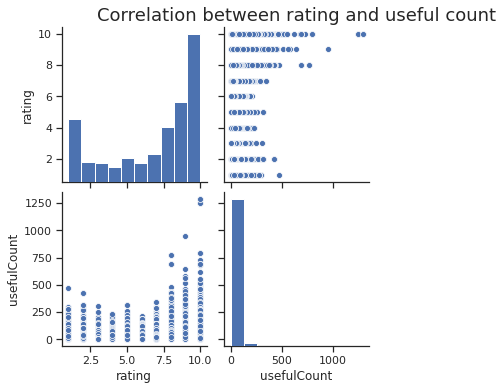

In [14]:
#Pairplot to see the correlation of numeric columns: rating and usefulCount

sns.set (style="ticks")
sns.pairplot(df_train, vars = ["rating", "usefulCount"])
plt.title('Correlation between rating and useful count', size = 18)

#Pairplot doesn't include uniqueID, since it is just an assigned number to each row
#As rating gets polarized usefulCount seems higher
#usefulCount, review, rating will be compared

In [15]:
#Check how many unique drug name and condition are

print("Number of unique number of drug name:", df_train['drugName'].nunique())
print("Number of unique number of condition:", df_train['condition'].nunique())

Number of unique number of drug name: 3408
Number of unique number of condition: 810


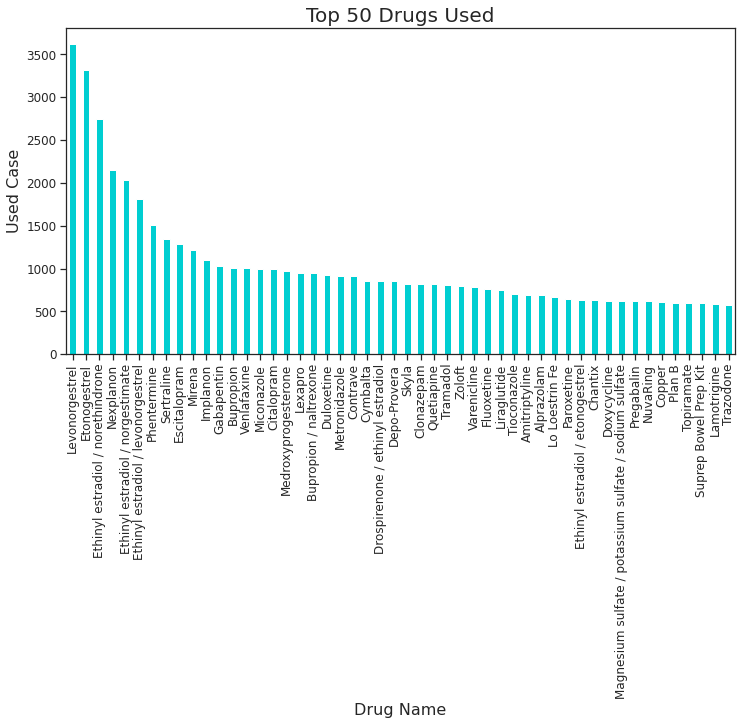

In [16]:
#Check most used drugs top 50

condition = df_train.drugName.value_counts().sort_values(ascending=False)
condition [:50].plot(kind='bar', figsize = (12, 6), fontsize = 12, color="darkturquoise")
plt.title('Top 50 Drugs Used', fontsize = 20)
plt.xlabel('Drug Name', fontsize = 16)
plt.ylabel('Used Case', fontsize = 16)
plt.xticks(rotation=90);

In [17]:
# Check drug name that has rating average 

rate_ls = []

for i in df_train.drugName.unique():
    
    # Only consider drugs that have at least 10 ratings
    if np.sum(df_train.drugName == i) >= 10:
        rate_ls.append((i, np.sum(df_train[df_train.drugName == i].rating) / np.sum(df_train.drugName == i)))
    
avg_rate = pd.DataFrame(rate_ls)
avg_rate.columns =['Drug Name', 'Average Rating'] 

In [18]:
#Compare top 10 and bottom 10 drugs and averate rating side by side

df1 = avg_rate.sort_values(by=['Average Rating'], ascending=False).reset_index(drop=True)

def display_side_by_side(*args):
    html_str=''
    for df1 in args:
        html_str+= df1.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
display_side_by_side(df1[:10], df1[-10:])

,Drug Name,Average Rating
0,Silver sulfadiazine,10.000000
1,Zutripro,10.000000
2,Chlorpheniramine / hydrocodone / pseudoephedrine,10.000000
3,Drixoral Cold and Allergy,9.944444
4,Dexbrompheniramine / pseudoephedrine,9.942857
5,Aprepitant,9.900000
6,Emend,9.900000
7,Tegaserod,9.812500
8,Opium,9.700000
9,Zelnorm,9.687500


In [19]:
#Check the average rate distribution

avg_rate.describe()
#There are a lot more positive (>5) rating since even 25% is 6.262136 and mean is 7.137923

,Average Rating
count,1369.000000
mean,7.137923
std,1.347924
min,1.193548
25%,6.262136
50%,7.285714
75%,8.111111
max,10.000000


In [20]:
#Check how many conditions each drug is prescribed for

condition_ls = []

for i in df_train.drugName.unique():
    condition_ls.append((i, (df_train[df_train.drugName == i].condition.unique())))
    
condition_per_drug = pd.DataFrame(condition_ls)
condition_per_drug.columns =['Drug Name', 'Condtions'] 
condition_per_drug.head()

,Drug Name,Condtions
0,Valsartan,"[Left Ventricular Dysfunction, High Blood Pres..."
1,Guanfacine,"[ADHD, High Blood Pressure, Tourette's Syndrome]"
2,Lybrel,"[Birth Control, Endometriosis]"
3,Ortho Evra,[Birth Control]
4,Buprenorphine / naloxone,[Opiate Dependence]


Text(0.5, 1.0, 'The number of Conditions used per top 50 Drugs')

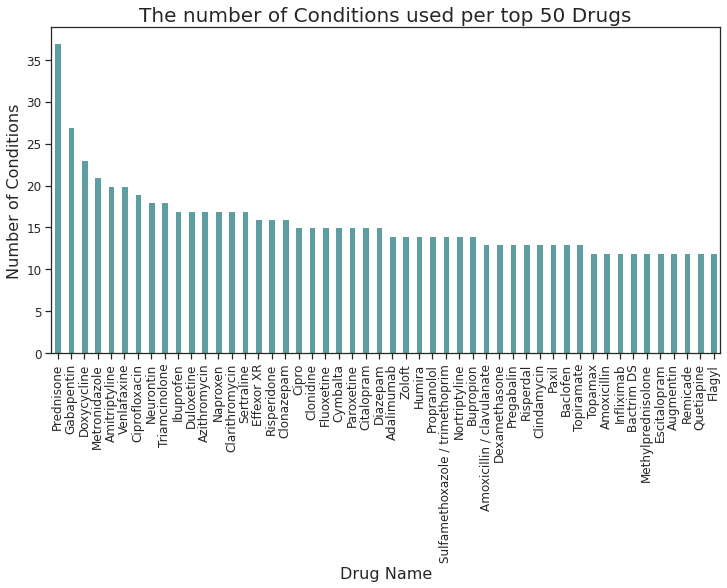

In [21]:
#Check top 50 drug names that have the most numbers of conditions
conditions_drug = df_train.groupby(['drugName'])['condition'].nunique().sort_values(ascending=False)
conditions_drug[0:50].plot(kind="bar", figsize = (12, 6), fontsize = 12, color="cadetblue")
plt.xlabel("Drug Name", fontsize = 16)
plt.ylabel("Number of Conditions", fontsize = 16)
plt.title("The number of Conditions used per top 50 Drugs", fontsize = 20)

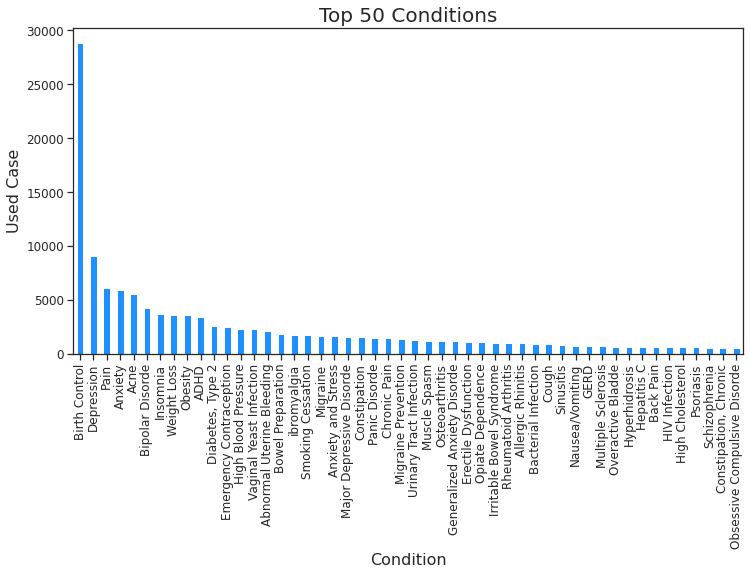

In [22]:
#Check top 50 conditions
condition = df_train.condition.value_counts().sort_values(ascending=False)
condition [:50].plot(kind='bar', figsize = (12, 6), fontsize = 12, color="dodgerblue")
plt.title('Top 50 Conditions', fontsize = 20)
plt.xlabel('Condition', fontsize = 16)
plt.ylabel('Used Case', fontsize = 16)
plt.xticks(rotation=90);
#By far, birth control was the number one condition in this dataset

Text(0.5, 1.0, 'The number of drugs used per top 50 conditions')

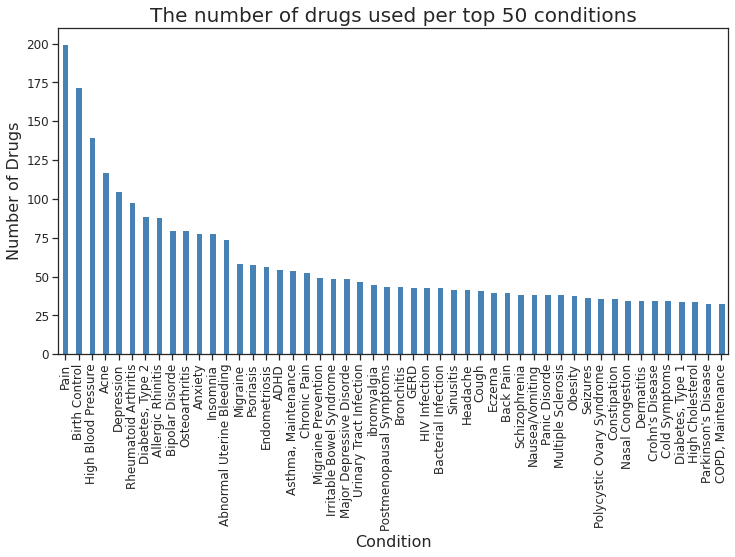

In [23]:
#Check top 50 conditions that have the most numbers of drugs
drug_condition = df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
drug_condition[0:50].plot(kind="bar", figsize = (12, 6), fontsize = 12, color="steelblue")
plt.xlabel("Condition", fontsize = 16)
plt.ylabel("Number of Drugs", fontsize = 16)
plt.title("The number of drugs used per top 50 conditions", fontsize = 20)

In [24]:
#Check how many conditions have only one drug
condition_few = df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=True)
condition_few.head(175)
#There are 171 conditions in training set that only have 1 drug, I will probably drop these 

condition
Postoperative Increased Intraocular Pressure    1
Ventricular Arrhythmia                          1
Lewy Body Dementia                              1
Leukocytoclastic Vasculitis                     1
Legionella Pneumonia                            1
                                               ..
Neoplastic Diseases                             1
Hepatic Tum                                     2
Rejection Prophylaxis                           2
Prevention of Atherothrombotic Events           2
Lactose Intolerance                             2
Name: drugName, Length: 175, dtype: int64

In [25]:
#Check the stopwords to see 

stopword_list = set(stopwords.words('english'))
print('number of stopword list: ', len(stopword_list))
print(stopword_list)

number of stopword list:  179
{'were', 'any', 'over', 'most', 'having', "couldn't", 'being', "needn't", 'what', 'with', 'now', 'it', 'y', 'out', 'she', 'where', 'her', 'should', 'was', 'which', "haven't", 'but', 'm', 'down', "should've", 'how', 'from', "don't", 'is', 'myself', "weren't", 'and', 'himself', 'few', 'herself', 'just', "you'll", 'hers', 're', 'when', 'after', 'shan', 'in', 'him', 'against', 'your', 'about', 'wouldn', 'on', 'don', 'aren', 'both', "that'll", 'up', 'so', "shouldn't", "she's", 'too', 'these', 'each', 'who', 'did', 'until', 'theirs', 'that', 'am', "doesn't", 'a', 'such', 'doing', 'be', 'if', 'into', 'only', 'during', 'ma', 'are', 'our', 'here', 'its', "won't", 'above', 'ours', 'have', 'own', 'then', 'yours', 'same', "didn't", 'you', 'those', 'their', "you'd", 'itself', 'd', 't', 'to', 'weren', 'not', 'while', 'why', 'hasn', 'yourself', 'didn', 'me', 'haven', 'themselves', 'my', 'needn', 'hadn', 'do', 'all', 'as', 'or', "mustn't", "it's", 'doesn', 'whom', 'been',

In [9]:
#General stopword_list from nltk.corpus gets rid of too many words that indicate 
#positivity or negativity
#Make a hand curated stop words list
#Added words that indicate time

stop_word = {'have', 'can', 'over', 'y', 'yourself', 'o', 'are', 'do', 'me', 'most', 'him', 
             'being', 'few', "you're", 'whom', 'does', 'out', 'which', 'while', 'them', 'we', 
             'had', 'be', "it's", 'and', 'yours', 'about', 's', 've', 'a', 'by', 'if', 'once', 
             'on', 'after', 'during', 'up', 'it', 'myself', 'their', 'these', 'until', 'of', 
             'all', 'through', 'just', "should've", "you've", 'below', 'itself', 'my', 'did', 
             'to', 'from', 'under', 'between', 'own', 'here', 'as', 'so', "she's", 'there', 
             'because', 'each', 'further', 'other', 'hers', 'i', 'your', 'off', 'those', 'very', 
             'll', 'ourselves', 'was', 'at', 'd', 'same', 'than', "you'll", 'for', 'this', 'its', 
             'any', 'but', 'how', 'when', 'then', 'before', 'more', 'am', 'has', 'doing', 
             'what', 'that', 'he', 'ours', 'why', 'ma', 'both', 'been', 'his', 'themselves', 'too',
             'our', 'in', 'were', 'should', 'the', 'they', 'yourselves', 'with', 'who', 'having', 
             'will', 'is', 'above', 'himself', 'an', 'herself', 'theirs', 'only', 'her', 'such', 
             'some', 'she', "that'll", 't', 'where', 'or', "you'd", 're', 'm', 'into', 'you', 
             'down', 'month', 'day', 'week','year', 'hour', 'minute', 'second', 'mg'}

In [27]:
#Count how many stop words 
len(stop_word)

144

In [28]:
#Tokenize reviews divided by rating: rating 1-5 is negative, rating 6-10 is poisitive

df_train_negative = df_train[df_train['rating'] <= 5]
token_train_negative = df_train_negative.review.apply(word_tokenize)

df_train_positive = df_train[df_train['rating'] > 5]
token_train_positive = df_train_positive.review.apply(word_tokenize)

df_test_negative = df_test[df_test['rating'] <= 5]
token_test_negative = df_test_negative.review.apply(word_tokenize)

df_test_positive = df_test[df_test['rating'] > 5]
token_test_positive = df_test_positive.review.apply(word_tokenize)

print(token_train_negative)

2         [i, used, to, take, another, oral, contracepti...
5         [nd, day, on, mg, started, to, work, with, roc...
6         [he, pulled, out, but, he, cummed, a, bit, in,...
8         [i, ve, had, nothing, but, problems, with, the...
12        [i, had, crohn, s, with, a, resection, years, ...
                                ...                        
161285    [used, this, a, month, ago, for, allergic, con...
161286    [this, is, the, third, med, i, ve, tried, for,...
161289    [up, to, mg, seems, to, work, about, once, eve...
161293    [i, was, given, this, in, iv, before, surgey, ...
161294    [limited, improvement, after, months, develope...
Name: review, Length: 47424, dtype: object


In [29]:
#Remove hand curated stop_word and punctuation and perform stemming from words_nltk

stemmer = SnowballStemmer("english")
#negative rating train data
TokensWOStop_train_n = []
for item in token_train_negative:
    temp_train_n = []
    for word in item:
        if word not in punctuation and word not in stop_word:
            word = stemmer.stem(word)
            temp_train_n.append(word)
    TokensWOStop_train_n.append(temp_train_n) 

#positive rating train data
TokensWOStop_train_p = []
for item in token_train_positive:
    temp_train_p = []
    for word in item:
        if word not in punctuation and word not in stop_word:
            word = stemmer.stem(word)
            temp_train_p.append(word)
    TokensWOStop_train_p.append(temp_train_p) 

#negative rating test data
TokensWOStop_test_n = []
for item in token_test_negative:
    temp_test_n = []
    for word in item:
        if word not in punctuation and word not in stop_word:
            word = stemmer.stem(word)
            temp_test_n.append(word)
    TokensWOStop_test_n.append(temp_test_n) 
    
#positive rating test data
TokensWOStop_test_p = []
for item in token_test_positive:
    temp_test_p = []
    for word in item:
        if word not in punctuation and word not in stop_word:
            word = stemmer.stem(word)
            temp_test_p.append(word)
    TokensWOStop_test_p.append(temp_test_p) 
    
print('total number of negative train tokens:', len(TokensWOStop_train_n))
print('total number of positive train tokens:', len(TokensWOStop_train_p))
print('total number of negative test tokens:', len(TokensWOStop_test_n))
print('total number of positive test tokens:', len(TokensWOStop_test_p))

total number of negative train tokens: 47424
total number of positive train tokens: 111635
total number of negative test tokens: 16000
total number of positive test tokens: 37047


In [30]:
#Check the most frequent words 

allWords_n = []
for wordList in TokensWOStop_train_n:
    allWords_n += wordList
FreqDist(allWords_n)

allWords_p = []
for wordList in TokensWOStop_train_p:
    allWords_p += wordList
FreqDist(allWords_p)

FreqDist({'no': 44672,
          'side': 39999,
          'effect': 47792,
          'take': 70617,
          'combin': 2019,
          'bystol': 180,
          'fish': 156,
          'oil': 593,
          'son': 1666,
          'halfway': 99,
          'fourth': 388,
          'intuniv': 121,
          'becam': 2362,
          'concern': 1379,
          'began': 3246,
          'last': 15602,
          'start': 39205,
          'highest': 254,
          'dose': 13346,
          'two': 14975,
          'day': 27402,
          'could': 9869,
          'hard': 4691,
          'get': 39445,
          'bed': 4088,
          'cranki': 125,
          'slept': 1192,
          'near': 2482,
          'hour': 11233,
          'drive': 4939,
          'home': 2284,
          'school': 2442,
          'vacat': 215,
          'unusu': 292,
          'call': 2170,
          'doctor': 21295,
          'monday': 478,
          'morn': 8342,
          'said': 5009,
          'stick': 1523,
          '

In [31]:
#Pick top 100 words for word cloud

frequent_word_n = FreqDist(allWords_n).most_common(100)
frequent_word_p = FreqDist(allWords_p).most_common(100)

In [32]:
#Make top 100 words into string

makeitastring_n = ''.join(map(str, frequent_word_n))
makeitastring_p = ''.join(map(str, frequent_word_p))

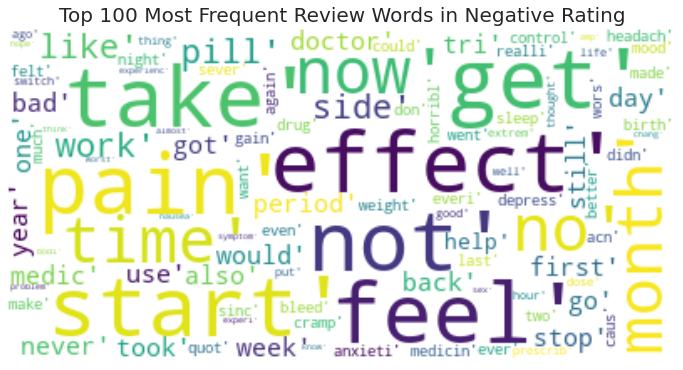

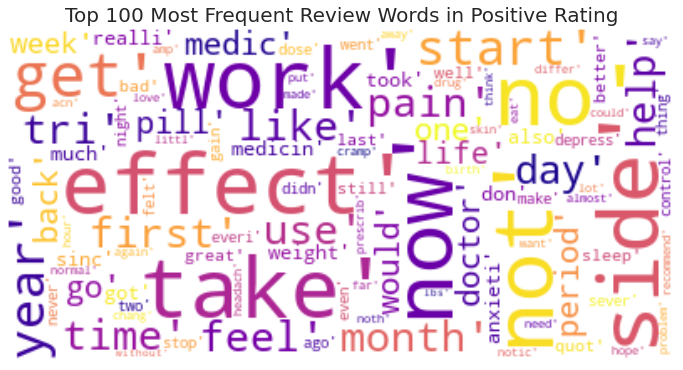

In [33]:
#Make top 100 words into word cloud

worldcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", colormap='viridis').generate(makeitastring_n)
plt.figure(figsize=[12, 12])
plt.imshow(worldcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Top 100 Most Frequent Review Words in Negative Rating', size=20)
plt.show()

worldcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", colormap='plasma').generate(makeitastring_p)
plt.figure(figsize=[12, 12])
plt.imshow(worldcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Top 100 Most Frequent Review Words in Positive Rating', size=20)
plt.show()

In [34]:
#Pick top 20 words for the side by side bar plots

frequent_word_n_20 = FreqDist(allWords_n).most_common(20)
frequent_word_p_20 = FreqDist(allWords_p).most_common(20)

df_frequent_n = pd.DataFrame(frequent_word_n_20)
df_frequent_p = pd.DataFrame(frequent_word_p_20)

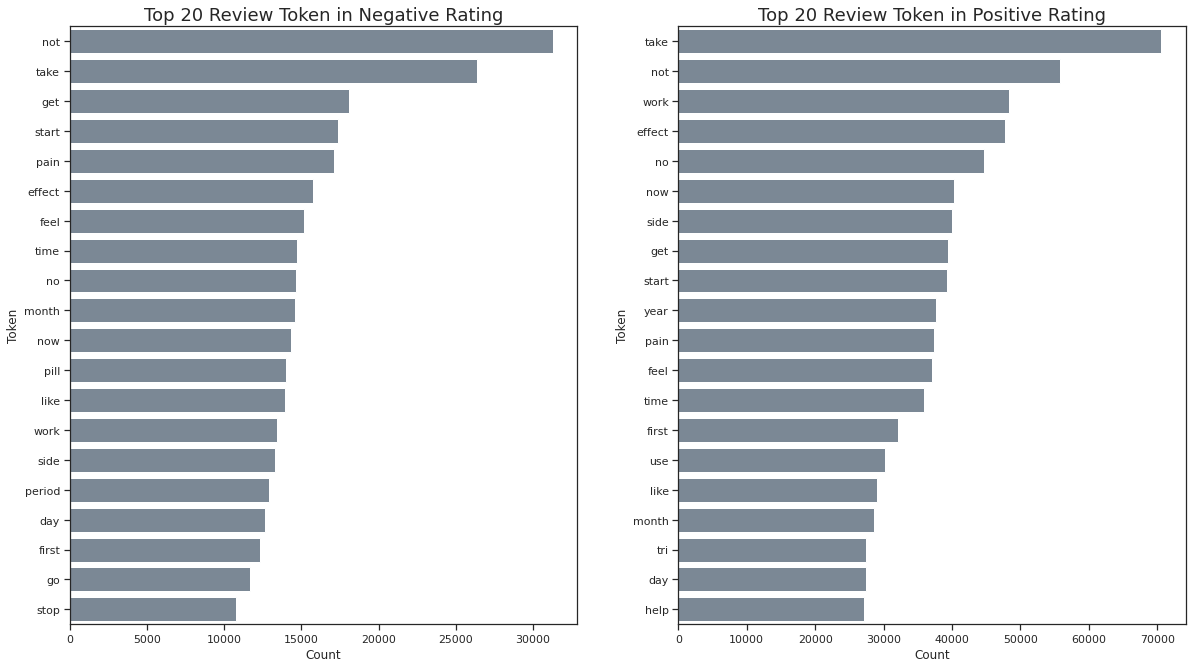

In [35]:
# Barplot that shows the top 20 words
plt.rcParams['figure.figsize'] = [20,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_n = sns.barplot(x = df_frequent_n[1], y = df_frequent_n[0], color = 'lightslategrey', ax = ax[0])
sns_p = sns.barplot(x = df_frequent_p[1], y = df_frequent_p[0], color = 'lightslategray', ax = ax[1])

# Setting axes labels
sns_n.set_title("Top 20 Review Token in Negative Rating")
sns_p.set_title("Top 20 Review Token in Positive Rating")
sns_n.set_xlabel("Count")
sns_p.set_xlabel("Count")
sns_n.set_ylabel("Token")
sns_p.set_ylabel("Token");

#There are many overlapping words between negative and positive reviews but different in quantities

In [10]:
#Determine reviews are positive (1) or negative (-1) by polarity analysis

polarity_train = []
for review in tqdm(df_train.review):
    blob = TextBlob(review)
    polarity_train += [blob.sentiment.polarity]
    
polarity_test = []
for review in tqdm(df_test.review):
    blob = TextBlob(review)
    polarity_test += [blob.sentiment.polarity]

100%|██████████| 53471/53471 [02:24<00:00, 371.02it/s]


In [10]:
#Determine reviews are relevant by subjectivity analysis: 0 is not relevant and 1 is highly relevant

subjectivity_train = []
for review in tqdm(df_train.review):
    blob = TextBlob(review)
    subjectivity_train += [blob.sentiment.subjectivity]

subjectivity_test = []
for review in tqdm(df_test.review):
    blob = TextBlob(review)
    subjectivity_test += [blob.sentiment.subjectivity]

100%|██████████| 53047/53047 [02:32<00:00, 347.56it/s]


In [11]:
#Append sentiments in train and test dataset

df_train["polarity"] = polarity_train
df_test["polarity"] = polarity_test

df_train["subjectivity"] = subjectivity_train
df_test["subjectivity"] = subjectivity_test

df_train.head()

,drugName,condition,review,rating,usefulCount,polarity
0,Valsartan,Left Ventricular Dysfunction,it has no side effect i take it in combinati...,9,27,0.000000
1,Guanfacine,ADHD,my son is halfway through his fourth week of ...,8,192,0.168333
2,Lybrel,Birth Control,i used to take another oral contraceptive wh...,5,17,0.067210
3,Ortho Evra,Birth Control,this is my first time using any form of birth...,8,10,0.179545
4,Buprenorphine / naloxone,Opiate Dependence,suboxone has completely turned my life around...,9,37,0.194444


In [6]:
print("Maximum polarity is:", df_train.polarity.max())
print("Minimum polarity is:", df_train.polarity.min())
print("Maximum subjectivity is:", df_train.subjectivity.max())
print("Minimum subjectivity is:", df_train.subjectivity.min())

AttributeError: 'DataFrame' object has no attribute 'polarity'

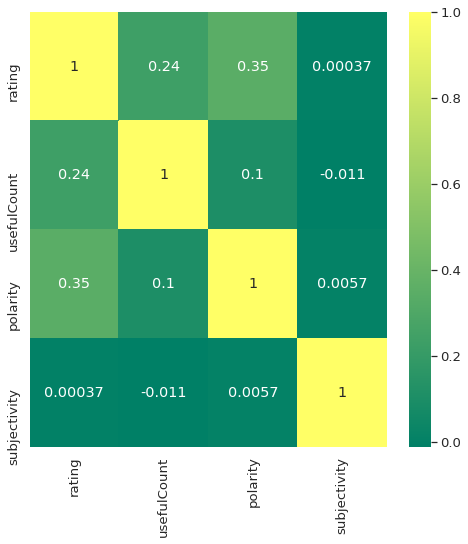

In [41]:
# Check the correlation Heatmap of numeric value columns

plt.rcParams['figure.figsize'] = [8, 8]
sns.set(font_scale = 1.2)
correlation = df_train.corr()
sns_ = sns.heatmap(correlation, annot = True, cmap = 'summer')
plt.setp(sns_.get_xticklabels(), rotation = 90);

#rating and polarity are most correlated, and usefulCount and rating, but subjectivity is not related.
#rating, usefulCount, review, and polarity will be used for machine learning 

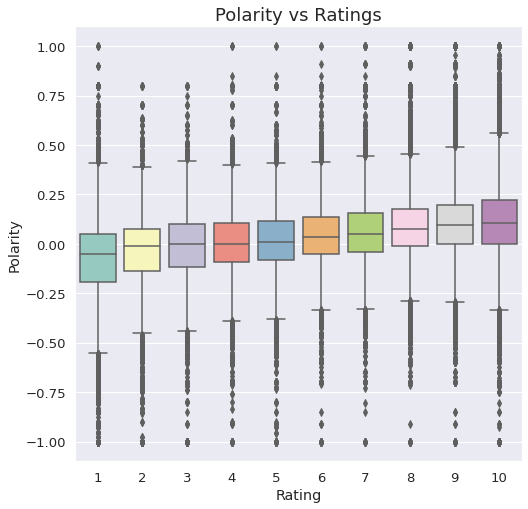

In [42]:
#Check the correlation 

sns.boxplot(x=df_train["rating"],y=df_train["polarity"], palette="Set3")
sns.set(style="whitegrid")
plt.xlabel("Rating")
plt.ylabel("Polarity")
plt.title("Polarity vs Ratings", size = 18)
plt.show()

#As the boxplot shows, low rating has negative polarity, high rating has positive polarity
#Around rating 3 or 4 has 0 polarity

In [12]:
#Importing necessary libraries for machine learning and evaluatig
from time import time
import nltk
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

In [13]:
#Set target value as classification (positive as 1, negative as 0)

df_train['target'] = df_train['polarity'] > 0
df_test['target'] = df_test['polarity'] > 0

In [14]:
#Convert target values to numeric

df_train[['target']]  *= 1
df_test[['target']]  *= 1

In [23]:
df_train

,drugName,condition,review,rating,usefulCount,polarity,target
0,Valsartan,Left Ventricular Dysfunction,it has no side effect i take it in combinati...,9,27,0.000000,0
1,Guanfacine,ADHD,my son is halfway through his fourth week of ...,8,192,0.168333,1
2,Lybrel,Birth Control,i used to take another oral contraceptive wh...,5,17,0.067210,1
3,Ortho Evra,Birth Control,this is my first time using any form of birth...,8,10,0.179545,1
4,Buprenorphine / naloxone,Opiate Dependence,suboxone has completely turned my life around...,9,37,0.194444,1
...,...,...,...,...,...,...,...
161292,Campral,Alcohol Dependence,i wrote my first report in mid october of ...,10,125,0.233704,1
161293,Metoclopramide,Nausea/Vomiting,i was given this in iv before surgey i immed...,1,34,-0.276389,0
161294,Orencia,Rheumatoid Arthritis,limited improvement after months developed ...,2,35,-0.223810,0
161295,Thyroid desiccated,Underactive Thyroid,i ve been on thyroid medication years i spe...,10,79,0.212597,1


In [15]:
#Set X and y since the data is already split into train, test sets

X_train = df_train["review"].values
y_train = df_train["target"].values

X_test = df_test["review"].values
y_test = df_test["target"].values

In [16]:
#TfidfVectorizer review for machine learning

vectorizer = TfidfVectorizer(min_df = 1,lowercase = False, ngram_range = (1,2), use_idf = True, stop_words=stop_word, max_features=2000, analyzer='word')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [49]:
#First machine learning model: Multinomial Naive Bayes

start_time = time()
NB = MultinomialNB().fit(X_train, y_train)
NB_pred = NB.predict(X_test)
run_time = time() - start_time
print("Training time: %s" % str(run_time))
print("Accuracy: %s" % str(NB.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(NB_pred, y_test))

Training time: 0.14923715591430664
Accuracy: 0.7378362584123513
Confusion Matrix
[[ 7636  1451]
 [12456 31504]]


In [50]:
#Second machine learning model: Logistic Regression

start_time = time()
lr = LogisticRegression(solver="saga").fit(X_train, y_train)
lr_pred = lr.predict(X_test)
run_time = time() - start_time
print("Training time: %s" % str(run_time))
print("Accuracy: %s" % str(lr.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(lr_pred, y_test))

Training time: 4.486481189727783
Accuracy: 0.883065960374762
Confusion Matrix
[[16612  2723]
 [ 3480 30232]]


In [51]:
#Third machine learning model: SGDClassifier

start_time = time()
SGD = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
SGD_fit = SGD.fit(X_train, y_train)
SGD_pred = SGD_fit.predict(X_test)
run_time = time() - start_time
print("Training time: %s" % str(run_time))
print("Accuracy: %s" % str(SGD.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(SGD_pred, y_test))

Training time: 1.0820281505584717
Accuracy: 0.8634230022432937
Confusion Matrix
[[15305  2458]
 [ 4787 30497]]


In [52]:
#Fourth machine learning model: RandomForestClassifier

start_time = time()
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 10, min_samples_split = 0.1)
rf_fit = rf.fit(X_train, y_train)
rf_pred = rf_fit.predict(X_test)
run_time = time() - start_time
print("Training time: %s" % str(run_time))
print("Accuracy: %s" % str(rf.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(rf_pred, y_test))

Training time: 25.083850860595703
Accuracy: 0.6444662280619073
Confusion Matrix
[[ 1242    10]
 [18850 32945]]


In [53]:
#Fifth machine learning model: LinearSVC

start_time = time()
svm = LinearSVC(C=1, random_state=818)
svm_fit = svm.fit(X_train, y_train)
svm_pred = svm_fit.predict(X_test)
run_time = time() - start_time
print("Training time: %s" % str(run_time))
print("Accuracy: %s" % str(svm.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(svm_pred, y_test))

Training time: 4.797670364379883
Accuracy: 0.8850830395686844
Confusion Matrix
[[16931  2935]
 [ 3161 30020]]


In [ ]:
#sixth machine learning model: AdaBoostClassifier

start_time = time()
ab = AdaBoostClassifier(n_estimators=100,
                        learning_rate=0.5,
                        random_state=818)
ab_fit = ab.fit(X_train, y_train)
ab_pred = ab_fit.predict(X_test)
run_time = time() - start_time
print("Training time: %s" % str(run_time))
print("Accuracy: %s" % str(ab.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(ab_pred, y_test))

Training time: 184.62901544570923
Accuracy: 0.7795916828472864
Confusion Matrix
[[10284  1884]
 [ 9808 31071]]


In [ ]:
#seventh machine learning model: XGBClassifier

start_time = time()
xgb = XGBClassifier(n_estimators=100,
                    tree_method='hist',
                    subsample=0.67,
                    colsample_level=0.06,
                    verbose=0,
                    n_jobs=6,
                    random_state=818)
xgb_fit = xgb.fit(X_train, y_train)
xgb_pred = xgb_fit.predict(X_test)
run_time = time() - start_time
print("Training time: %s" % str(run_time))
print("Accuracy: %s" % str(xgb.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(xgb_pred, y_test))

In [ ]:
#eighth machine learning model: LGBMClassifier

start_time = time()
lgbm = LGBMClassifier(n_estimators=100,
                      feature_fraction=0.06,
                      bagging_fraction=0.67,
                      bagging_freq=1,
                      verbose=0,
                      n_jobs=6,
                      random_state=818)
lgbm_fit = lgbm.fit(X_train, y_train)
lgbm_pred = lgbm_fit.predict(X_test)
run_time = time() - start_time
print("Training time: %s" % str(run_time))
print("Accuracy: %s" % str(lgbm.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(lgbm_pred, y_test))

In [17]:
from scipy.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


In [17]:
#Train a MLP model

mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=1000, activation = 'relu', solver = 'adam', 
                   batch_size=10, random_state=0).fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)

print (pearsonr(mlp_pred, y_test)[0])

0.800904390497773


In [ ]:
#Hyperparameter tuning

for hidden_units in tqdm(range (10, 201, 50)):
    mlp = MLPRegressor(hidden_layer_sizes=(hidden_units), max_iter=1000, 
                   batch_size=10, random_state=0).fit(X_train, y_train)
    mlp_pred = mlp.predict(X_test)
    print (hidden_units, pearsonr(mlp_pred, y_test)[0])

#Couldn't run this since kernel was quitting

In [20]:
#Build a deep learning model using Keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(2000,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(rate=0, noise_shape=None, seed=None))
model.add(keras.layers.Dense(20))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Flatten(data_format=None))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                20010     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                220       
_________________________________________________________________
batch_normalization_3 (Batch (None, 20)                80        
_________________________________________________________________
activation_3 (Activation)    (None, 20)               

In [1]:
#Train the model, predict, and evaluate

deep_model = model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32)

deep_pred = model.predict(X_test, batch_size=32)

deep_loss_metrics = model.evaluate(X_test.toarray(), y_test, batch_size=32)
print('Loss_and_metrics : ' + str(deep_loss_metrics))

#Unfortunately, I couldn't finish running this since kernel was quiting

NameError: name 'model' is not defined